# Homework 3: Neural Networks


This assignment is due on Moodle by **11:59pm on Friday October 16**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).


**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework, we will use [PyTorch](https://pytorch.org/) and [PyTorch Lightning](https://pytorch-lightning.readthedocs.io/en/latest/introduction_guide.html) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for [PyTorch](https://pytorch.org/get-started/locally/) (version: 1.6.0) as the backend for PyTorch Lightning. Then install [PyTorch Lighntning](https://pytorch-lightning.readthedocs.io/en/latest/introduction_guide.html) (version: 0.9.0).

```
pip install --upgrade pip

pip install torch

pip install pytorch-lightning

```

It is **highly recommended** you install the CPU-only version of PyTorch if your'e unfamiliar with the process of installing CUDA libraries for these packages. If you choose to install a GPU version, ensure you're code runs without GPU support.

**Acknowledgment** : Chris Ketelsen

**Please put your name and cuidentity username.**

**Name**: Soroush Khadem

**Identity Key**: sokh4726

In [3]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

# Test PyTorch installation
import torch 
import pytorch_lightning as pl

pl.seed_everything(1234)

1234

[20 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

### Part 1 [10 points] 
Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

## NOT $x_1$
Truth table:

| $x_1$ | Out |
|---|---|
| 0 | 1 |
| 1 | 0 |

A single layer perceptron can learn the NOT function by simply setting $w_1$ to -2 and bias to 1. Thus, when a 0 is passed in, the output becomes just the bias (1) and when a 1 is passed in the output becomes $-2 + 1 = -1 \rightarrow$ pred is 0.

## $x_1$ NAND $x_2$
Truth table:

| $x_1$ | $x_2$ | Out |
|---|---|---|
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |
$\textbf{w} = (-1, -1)$, $b=1.5$

## $x_1$ XNOR $x_2$
Truth table:

| $x_1$ | $x_2$ | Out |
|---|---|---|
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Since the data is not linearly separable, a single layer perceptron cannot learn the XNOR function

### Part 2 [10 points] 

Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

$x_1 \text{ XNOR } x_2 = (x_1 \text{ AND } x_2) \text{ OR } (x_1 \text{ NOR } x_2)$

Since we know how to combine perceptrons, we can chain together an AND, a NOR, and cobine with and OR:

XNOR = OR(AND, NOR)



| $x_1$ | $x_2$ | Out |
|---|---|---|
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

$\textbf{W}^1 =\begin{bmatrix}
1 & 1 \\
-1 & -1 
\end{bmatrix}$,
$b^1=\begin{bmatrix}
-1.5\\
0.5 
\end{bmatrix}$

$\textbf{W}^2=\begin{bmatrix}
1\\
1 
\end{bmatrix}$, $b^2 = -0.5$

Testing on $x_1 = 1$, $x_2 = 1$:

$h_1 = W^1_{11} * x_1 + W^1_{12} * x_2 + b^1_{1} = 1 * 1 + 1 * 1 - 1.5 = 0.5 \rightarrow$ activate to 1

$h_1 = W^1_{21} * x_1 + W^1_{22} * x_2 + b^1_{2} = 1 * -1 + 1 * -1 + 0.5 = -1.5 \rightarrow$ activate to 0

$o_1 = W^2_{1} * h_1 + W^2_{2} * h_2 + b^2 = 1 * 1 + 0 * 1 - 0.5 = 0.5 \rightarrow$ pred 1


In [4]:
# YOUR CODE HERE
class XNORPerceptron:
    def __init__(self):
        # Hard code the weights and biases
        self.Ws = [np.array([[1, 1], [-1, -1]]), np.array([1, 1])]
        self.bs = [np.array([-1.5, 0.5]), np.array([-0.5])]
    
    def __call__(self, x1, x2):
        # Initialize hidden layer to the input
        hs = [np.array([x1, x2])]
        # Loop through weights and biases for hidden layers (all but last)
        for W, b in zip(self.Ws[:-1], self.bs[:-1]):
            hs.append(self.activate(np.dot(np.array([x1, x2]), W.T) + b))

        # Apply final params to final hidden layer to get output
        return self.activate(np.dot(self.Ws[-1].T, hs[-1]) + self.bs[-1])[0]

    def activate(self, input):
        # Simply saturate the negative to 0, positive to 1
        saturate = np.vectorize(lambda x : 1 if x >= 0 else 0)
        return saturate(input)

xnor = XNORPerceptron()
assert xnor(1, 1) == 1
assert xnor(1, 0) == 0
assert xnor(0, 1) == 0
assert xnor(0, 0) == 1

[25 points] Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

### Part 1 [5 points]
Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

$a^1 = \sigma(W^1 * x + b^1) = \sigma(1*0.5 - 0.5) = 0.5$

$a^2 = \sigma(W^2 * a^1 + b^2) = \sigma(1*0.5 - 0.5) = 0.5$

$a^3 = \sigma(W^3 * a^2 + b^3) = \sigma(1*0.5 - 0.5) = 0.5$

$a^4 = \sigma(W^4 * a^3 + b^4) = \sigma(1*0.5 - 0.5) = 0.5$




### Part 2 [5 points]:
Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

Let $z^l$ be the output of a layer of neurons before activation. i.e. $a^l = \sigma(z^l)$. Define $\delta^l$ to be the derivative of this output. For any layer, $l$:

$\delta^l = \frac{\partial\ell}{\partial z^l}$. Use chain rule: $= \frac{\partial\ell}{\partial a^l}\frac{da^l}{dz^l}$. Plug in derivative of the activation function $= \frac{\partial\ell}{\partial a^l}\sigma'(z^l)$. 

Note that for the last layer, we can use the cost function and defintion of the derivative of sigmoid to write: 
$\delta^4 =(a^4 - y) * \sigma(z^4) * (1 - \sigma(z^4))$

But, we are really after the loss w.r.t. the weights ($\frac{\partial\ell}{\partial W^l}$):

$\frac{\partial\ell}{\partial W^l} = \frac{\partial\ell}{\partial z^l} \frac{\partial z^l}{\partial W^l}$. So we need to compute the derivative of $z$ w.r.t. the weights. Since $z^l = W^l a^{l-1} + b^l$, $\frac{\partial z^l}{\partial W^l} = a^{l-1}$. So, $\frac{\partial\ell}{\partial W^3} = a^{l-1}\delta^l$ 

Similarly, $\frac{\partial\ell}{\partial b^l} = \frac{\partial\ell}{\partial z^l} \frac{\partial z^l}{\partial b^l}$. So, $\frac{\partial\ell}{\partial b^l} = \delta^l$

We now have formulae to use for the derivatives of any layer. In order to compute these, first build up partial derivatives w.r.t. $z$, working backwards from $a^4 and z^4$, the output value:

$\delta^4 = (y - a^4) * \sigma(z^4) * (1 - \sigma(z^4))$

$\delta^3 = \delta^4 * W^3 * \sigma(z^3) * (1 - \sigma(z^3))$

$\delta^2 = \delta^3 * W^2 * \sigma(z^2) * (1 - \sigma(z^2))$

$\delta^1 = \delta^2 * W^1 * \sigma(z^1) * (1 - \sigma(z^1))$

Now, can write down parital derivatives w.r.t. wieghts and biases:

$\partial \ell / \partial W^1 = \delta^1 * x$, $\partial \ell / \partial b^1 = \delta^1$

$\partial \ell / \partial W^2 = \delta^2 * a^1$, $\partial \ell / \partial b^2 = \delta^2$

$\partial \ell / \partial W^3 = \delta^3 * a^2$, $\partial \ell / \partial b^3 = \delta^3$


### Part 3 [5 points]
Implement the following activation functions in NumPy:
* ReLU
* Sigmoid
* softmax
Please **do not use any other external libraries** for this such as sklearn.

In [5]:
def relu(x):
    # YOUR CODE HERE
    return x if x > 0 else 0

def sigmoid(x):
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-x))

def softmax(x):
    # YOUR CODE HERE
    return x / np.sum(np.exp(x))

In [6]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.3', (relu, sigmoid, softmax))

TestRelu (tests.tests.TestActiv) ...ok
TestSigmoid (tests.tests.TestActiv) ...ok
TestSoftmax (tests.tests.TestActiv) ...ok

----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


### Part 4 [5 points] 
Implement the following Loss functions in NumPy:
* mean squared error
* mean absolute error
* hinge

Please **do not use any other external libraries** for this such as sklearn.

In [7]:
def mean_squared_error(yhat, y):
    # YOUR CODE HERE
    return np.mean(np.square(yhat - y))
    
def mean_absolute_error(yhat, y):
    # YOUR CODE HERE
    return np.mean(np.abs(yhat - y))

def hinge(yhat, y):
    # YOUR CODE HERE
    return np.mean(np.maximum(0, 1 - (y * yhat)))

In [8]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.4', (mean_squared_error, mean_absolute_error, hinge))

TestMSE (tests.tests.TestLoss) ...ok
TestMAE (tests.tests.TestLoss) ...ok
TestHinge (tests.tests.TestLoss) ...ok

----------------------------------------------------------------------
Ran 3 tests in 0.298s

OK


### Part 5 [5 points]
Explain the vanishing gradient problem. When would you observe this? Give an example.

The vanishing gradient problem is when the derivatives of the loss with respect to the weights gets so small that the weights practically do not change each update, essentially getting stuck. For example, when using a sigmoid activation, the gradient is typically less than the maximum value, and when multiplied with the gradient of the layer in front of it (since we are doing backpropagation) it gets even smaller, and so on for each layer. This can be solved by using an activation such as ReLu, so the gradient is much nicer.

[23 Points] Problem 3 - Build a feedforward neural network in NumPy
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Note that this class is almost identical to the one you worked with in the "hands-on neural network" in-class notebook, so you should look at there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests. As with the previous problem, nothing in this problem should use any external libraries apart from numpy. 

In [9]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes, keep_prob=-1):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        self.keep_prob = keep_prob
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """
        a_list = [np.zeros((n, 1)) for n in self.sizes]
        a_list[0] = a
        z_list = [np.zeros((n, 1)) for n in self.sizes]

        # Loop over layers and compute activities and activations 
        for l in range(self.L - 1):
            a = self.g(np.dot(self.weights[l], a) + self.biases[l])

        return a


    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)
    
    def log_train_progress(self, train, test, epoch):
        """ Logs training progres. 
        """
        acc_train = self.evaluate(train)
        self.acc_train_array.append(acc_train)
        if test is not None:
            acc_test = self.evaluate(test)
            self.acc_test_array.append(acc_test)
            print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                epoch+1, acc_train, acc_test))
        else:
            print("Epoch {:4d}: Train {:10.5f}".format(
                epoch+1, acc_train))
            

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                self.SGD_step(*train[perm[kk]], eta, lam)
            if verbose and epoch == 0 or (epoch + 1) % 20 == 0:
                self.log_train_progress(train, test, epoch)
    
    def SGD_step(self, x, y, eta, lam):
        """
        TODO: get gradients with x, y and do SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        # TODO: get gradients with xk, yk and do SGD on weights and biases
        # YOUR CODE HERE
        if self.keep_prob == -1:
            dW_list, db_list = self.back_prop(x, y)
        else:
            dW_list, db_list = self.back_prop_dropout(x, y)

        for l in range(self.L - 1):
            self.weights[l] -= (eta * (dW_list[l] + lam * self.weights[l]))
            self.biases[l] -= (eta * db_list[l])


    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta

        delta = [np.zeros((n,1)) for n in self.sizes]
        delta[self.L - 1] = self.grad_cost(a_list[self.L - 1], y) * self.g_prime(z_list[self.L - 1])

        for l in range(self.L - 2, -1, -1):
            dW_list[l] = np.dot(delta[l + 1], a_list[l].T)
            db_list[l] = delta[l + 1]
            delta[l] = np.dot(self.weights[l].T, delta[l + 1]) * self.g_prime(z_list[l])

        return (dW_list, db_list)
    
    def back_prop_dropout(self, x, y):
        """
        Back propagation with dropout on the hidden layers other than the output layer.
        
        Dropout layer can be thought of as a special linear layer between layers.
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        # dropouts.append(np.ones())
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match
        # TODO: implement dropout using self.keep_prob
        # YOUR CODE HERE
        # Setup binary mask of dropouts for each layer. Note we divide by the probability to keep the expectation of
        # the prediciton pass the same
        dropouts = [(np.random.rand(num_neurons, 1) < self.keep_prob).astype(float) / self.keep_prob for num_neurons in self.sizes[1:]]
        
        for W, b, dropout in zip(self.weights, self.biases, dropouts):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a *= dropout
            a_list.append(a)
        
        delta = [np.zeros((n,1)) for n in self.sizes]
        delta[self.L - 1] = self.grad_cost(a_list[self.L - 1], y) * self.g_prime(z_list[self.L - 1])

        # Pas with 1s to make the shape match. (dropout has no effect on the input)        
        dropouts.insert(0, np.ones(a_list[0].shape))

        for l in range(self.L - 2, -1, -1):
            dW_list[l] = np.dot(delta[l + 1], a_list[l].T)
            db_list[l] = delta[l + 1]
            # Turn off same nodes that were dropped out
            delta[l] = np.dot(self.weights[l].T, delta[l + 1]) * self.g_prime(z_list[l]) * dropouts[l]

        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += yhat.argmax() == y.argmax()
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

### Part 1 [15 points]
Implement `SGD_step`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [10]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ...ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ...ok

----------------------------------------------------------------------
Ran 2 tests in 0.445s

OK


### Part 2 [8 points]

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [11]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5
Epoch    1: Train    0.15726, Test    0.16567
Epoch   20: Train    0.81753, Test    0.73349
Epoch   40: Train    0.87635, Test    0.79392
Epoch   60: Train    0.88756, Test    0.79832
Epoch   80: Train    0.88956, Test    0.80152
Epoch  100: Train    0.89116, Test    0.79952
Epoch  120: Train    0.89836, Test    0.80072
Epoch  140: Train    0.89476, Test    0.79472
Epoch  160: Train    0.89156, Test    0.80112
Epoch  180: Train    0.89636, Test    0.79752
Epoch  200: Train    0.90036, Test    0.79952

Hidden Layer Dimensions:  10
Epoch    1: Train    0.26371, Test    0.26371
Epoch   20: Train    0.90996, Test    0.83954
Epoch   40: Train    0.93637, Test    0.85914
Epoch   60: Train    0.94078, Test    0.86435
Epoch   80: Train    0.94638, Test    0.86234
Epoch  100: Train    0.94478, Test    0.86234
Epoch  120: Train    0.94838, Test    0.86154
Epoch  140: Train    0.94838, Test    0.86795
Epoch 

Plot training and testing accuracies below for each configuration. Use solid lines for testing accuracy, and dotted lines for train accuracy (`ls='dashed`). 

Be sure to label your lines and match colors accordingly.

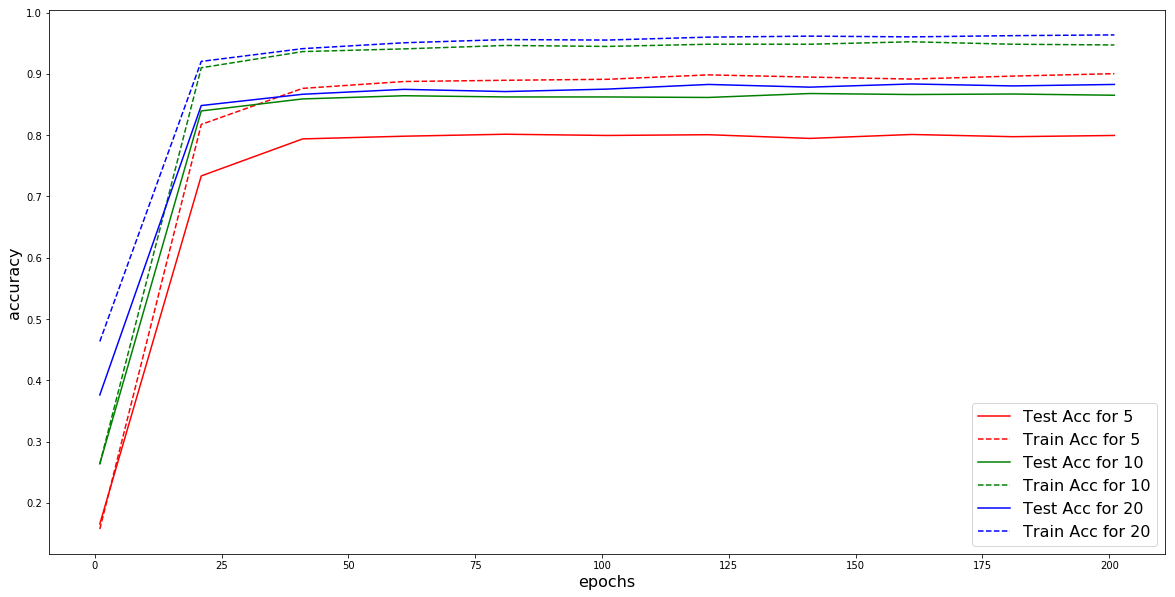

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
epochs_array = [i for i in range(1, 220, 20)]

colors = ['r', 'g', 'b']
for color, nn in zip(colors, nns):
    plt.plot(epochs_array, nn.acc_test_array, color=color, label='Test Acc for ' + str(nn.sizes[1]))
    plt.plot(epochs_array, nn.acc_train_array, color=color, ls='dashed', label='Train Acc for ' + str(nn.sizes[1]))

ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.show()

Give your explanation below.

The more hidden layers, the higher the accuracy. This makes sense, since with a deeper network, the network is able to learn the function more accuractely.

**Extra Credit [10 points]:** Implement dropout by filling the `back_prop_dropout` function and update the `SGD_train` function to use it. Explain the impact of dropout on performance.

In [13]:
from tests import tests
tests.run_test_suite('prob 4', Network)

TestBackPropDropoutWithoutRegularization (tests.tests.TestNetwork) ...Epoch   20: Train    0.70500
Epoch   40: Train    0.76500
ok

----------------------------------------------------------------------
Ran 1 test in 2.240s

OK


In [62]:
hidden_layer_dimensions = 60
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions], keep_prob=0.5)
nn.SGD_train(train, epochs=400, eta=0.1, lam=0, verbose=True, test=test)

Epoch    1: Train    0.11485, Test    0.11204
Epoch   20: Train    0.10004, Test    0.10044
Epoch   40: Train    0.44778, Test    0.42577
Epoch   60: Train    0.71429, Test    0.65946
Epoch   80: Train    0.74430, Test    0.69908
Epoch  100: Train    0.75270, Test    0.71068
Epoch  120: Train    0.83233, Test    0.76911
Epoch  140: Train    0.85154, Test    0.79512
Epoch  160: Train    0.85834, Test    0.80112
Epoch  180: Train    0.85914, Test    0.80272
Epoch  200: Train    0.86595, Test    0.80312
Epoch  220: Train    0.86795, Test    0.80872
Epoch  240: Train    0.86875, Test    0.80792
Epoch  260: Train    0.87035, Test    0.80552
Epoch  280: Train    0.87475, Test    0.80992
Epoch  300: Train    0.87515, Test    0.80552
Epoch  320: Train    0.87515, Test    0.81192
Epoch  340: Train    0.87635, Test    0.80792
Epoch  360: Train    0.87675, Test    0.80992
Epoch  380: Train    0.87835, Test    0.81192
Epoch  400: Train    0.87915, Test    0.81112


With dropout, a much larger network can be trained, without overfitting to the data. Dropout thus acts as a regularizer on the network as a whole. Thus, the performance stays high on test data, even with lam set to 0. Running on 400 epochs without dropout would result in much lower performance on the test data.

## [9 points] Problem 4 - Tensors and Autograd.
In this problem, we will demonstrate the benefits of PyTorch's Autograd mechanics by converting your implementation from Problem to utilize PyTorch Tensors. This problem is not meant to be difficult, rather it should be quite simple once you've done Problem 3.

Note that there are *better* ways to go about this which we will cover next. Here. we are keeping things as close to numpy as possible on purpose to show what's going on behind the scenes. Take a moment to look through our modifications to get an understanding of the differences. In the comments, we'll make notes of native torch functions that perform the same operations. 

Here, SGD is implemented manually to show you what's going on behind the scenes, but  usually you'd use [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD). For future reference, the `weight_decay` parameter implements L2 normilazion. 

--- 

Before we move forward, let's cover a couple of points on notation. 

Just as it's best practice to do `import numpy as np`, PyTorch has best practices for imports as well:

```python
import torch 
import torch.nn as nn
import torch.nn.functional as F
```
You'll find that many of the functions you've been learning in NumPy have direct translations in PyTorch. The documentation can be found [here](https://pytorch.org/docs/stable/index.html) and is very user friendly, but we'll cover a few notable differences. 

- The numpy parameter `axis` becomes `dim` in PyTorch.
- Tensors have [view](https://pytorch.org/docs/stable/tensor_view.html) operations, which avoid copying data unnecasarily. Use these instead of `reshape()`. 
- Using `torch.from_numpy()` also avoids copying data stored in `numpy` arrays.
- Numpy interprets `np.dot()` of 2D matrices as matrix multiplication. Pytorch does not have this behaviour, see instead [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)
- PyTorch uses trailing underscores such as `torch.add_()` to denote in-place operations. As an example, the following operations are equivilent:
```python
x = x + y
x = torch.add(x, y)
x.add_(y)
```
You're likely to see these operations when randomly initializing Tensors, or filling a tensor with zeros:
```python
torch.nn.init.uniform_(x)
x.zero_()
```

---
Now onto the problem, your tasks are as follows:

1. Modify `forward_prop` to work on PyTorch Tensors.
2. Modify `SGD_step` to work on PyTorch Tensors. This is easier than it sounds, since with PyTorch we don't have to worry about calculating gradients manually.

In [63]:
import torch


class TorchNetwork(Network):
    def __init__(self, sizes, keep_prob=-1):
        super().__init__(sizes, keep_prob)
        
        # Convert your weights and biases to Tensors.
        # The flag requires_grad=True tells PyTorch to track gradients for us. 
        self.biases = [torch.tensor(b, requires_grad=True) for b in self.biases]
        self.weights = [torch.tensor(w, requires_grad=True) for w in self.weights]
        

    def g(self, z):
        """ Activation function
            Could also use torch.sigmoid(z)
        """
        return sigmoid_torch(z) 

    def forward_prop(self, a):
        """ Memory aware forward propagation. 
            Now this is for both training and testing.
        
        """
        # TODO: Convert your forward_prop function from part a to work on Tensors. 
        # YOUR CODE HERE
        for W, b in zip(self.weights, self.biases):
            a = self.g(torch.matmul(W, a) + b)

        return a

    def cost(self, a, y):
        """ Cost function, same as F.mse_loss()
        """
        return ((a - y)**2).mean() 
            

    def SGD_step(self, x, y, eta, lam):
        """
            Performs a single step of SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        
        # Zero out the old gradients if they exist. 
        # Would be optim.zero_grad() if we were using an optimizer.
        for p in (*self.weights, *self.biases):
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()
            
        # TODO: 
        # (1) call forward_prop to get a. 
        # (2) Calucate loss using the cost function.
        # (3) Use loss.backward() to to perform backpropagation automatically.

        # YOUR CODE HERE
        a = self.forward_prop(x)
        loss = self.cost(a, y)
        loss.backward()

        # Perform sgd update 
        # Would be optimizer.step()
        with torch.no_grad():
            # l2 regularization on weights only.
            for p in self.weights:
                p.grad.add_(p, alpha=lam)
            # sgd update. 
            for p in (*self.weights, *self.biases):
                p.add_(p.grad, alpha=-eta)
                

def sigmoid_torch(z, threshold=20):
    """ Same as sigmoid before, now with torch.clamp() instead of np.clip().
        We could also just use torch.sigmoid().
    """
    z = torch.clamp(z, -threshold, threshold)
    return 1.0 / (1.0 + torch.exp(-z))


**Part 5 [10 points]:** Implement `SGD_step` and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [64]:
from tests import tests
tests.run_test_suite('prob 5', TorchNetwork)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ...ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ...ok

----------------------------------------------------------------------
Ran 2 tests in 1.310s

OK


[23 Points] Problem 5 - Implement RNN Network to classify whether text is spam or ham 
---

Dataset is obtained from UCI Machine Learning repository consisting of SMS tagged messages (labelled as either **ham** (legitimate) or **spam**) that have been collected for SMS Spam research.

We will now use [PyTorch](https://pytorch.org/docs/stable/index.html) (Pytorch Lightning to be precise) to implement a classifier. Update the snippet below to build a model with an embedding layer, and an LSTM layer, and a dense layer. This question allows you to get familiar with popular deep learning toolkits and the solution only has a few lines. In practice, there is no need to reinvent the wheels.


Learn more about RNN : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Note**: You need to install Tensorflow for this problem (CPU version if you do not have a nvidia GPU). You can find installation instructions [here](https://www.tensorflow.org/install)

If you are using Anaconda, install the CPU version by doing 
``` the end of the sequence, called pre- or post-sequence padding, can be specified by the “padding” argument, as follows.
Pre-Sequence Padding

Pre-sequence padding is the default (padding=’pre’)
conda install 'tensorflow=*=mkl*'
```

The following class converts textual data to sequences of numbers. Initially, we create a vocabulary of words such that each word is associated with a particular number. Then, for each new sentence, each word is replaced by its corresponding encoding.

For example, if we had an encoding : "I" : 1, "am" : 5, "alive"  : 9
Then the sentence "I am alive" would be represented as [1, 5, 9]

Now, since sentences can be of varying lengths and inputs to neural networks are fixed in size, we the input size to our model to be lager than the largest sentence and pad smaller sentences with 0's.

In [65]:
import multiprocessing as mp
import pickle
import pandas as pd
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from torch.utils.data import DataLoader, TensorDataset

import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger

class SpamHam(pl.LightningDataModule):
    """ A datamodule for the RNN. You shouldn't have to modify this class."""
    def __init__(self, dict_size=5000, example_length=150, batch_size=128):
        super().__init__()

        self.dict_size = dict_size
        self.batch_size = batch_size
        self.example_length = example_length

        # preprocess training data
        self.tok = Tokenizer(num_words=dict_size)

    def load_data(self, location):
        return pickle.load(open(location, 'rb'))

    def make_dataset(self, x, y, tok=None):
        # tokenize
        sequences = self.tok.texts_to_sequences(x)
        x = sequence.pad_sequences(sequences, maxlen=self.example_length)

        # make torch arrays.
        x = torch.from_numpy(x).to(torch.int64)
        y = torch.from_numpy(y).to(torch.float32)

        return TensorDataset(x, y)

    def setup(self, stage):
        # load data
        train_x, test_x, train_y, test_y = self.load_data('./data/spam_data.pkl')
        
        # fit tokenizer
        self.tok.fit_on_texts(train_x)        
        
        # make datasets
        self.train = self.make_dataset(train_x, train_y)
        self.test = self.make_dataset(test_x, test_y)

    def train_dataloader(self):
        return DataLoader(self.train, batch_size=self.batch_size, shuffle=True,
                          num_workers=mp.cpu_count() // 4)

    def test_dataloader(self):
        return DataLoader(self.test, batch_size=self.batch_size, shuffle=False,
                          num_workers=mp.cpu_count() // 4)

### Part 1 [15 points]
PyTorch Lightning expects your model to follow a standard class template. Once certain functions are completed, pl.Trainer() allows you train the model without explicitly writing a training loop. In the following example, you need to define the model and how the input is propagated through the model (called the forward pass) and then create the training and test steps.

Complete the functions `init`, `training_step`, and `test_step` and `forward`functions. 

In [138]:
class RNN(pl.LightningModule):
    """ RNN classifier """

    def __init__(self, embedding_length=32, dict_size=5000, example_length=150):
        """
        initialize RNN model
        :param embedding_length: size of word embedding
        """
        super().__init__()

        # To complete this function, you will need PyTorch's Embedding, LSTM and linear layers.
        
        # The embedding layer simply creates a dictionary between words in your vocabulary and their vector 
        # representations. Therefore, each word has a unique representation.
        # For instance, say your input x is encoded as [1, 5, 9] and embedding_dim = 32 (see documentation for 
        # arguments to this layer), then after passing through the embedding layer the output will be 
        # of shape 3x32
        
        # Documentation for LSTM layer in :
        #     https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM
        
        # Note there are multiple ways to define your model, 
        # we suggest adding individual layers here, but any method is fine.
        
        # As an example, you could define a linear layer with n inputs and m outputs like so:
        # self.linear = nn.Linear(n, m)
        
        # Similarly, define the three layers needed for your model
        
        # TODO: build model by defining individual layers in the network
            
        # YOUR CODE HERE
        # hidden_nodes = 1000
        self.embedding = nn.Embedding(dict_size, embedding_length)
        self.lstm = nn.LSTM(embedding_length, example_length, batch_first=True, num_layers=3)
        self.linear = nn.Linear(example_length, 1)
        
        self.example_input_array = torch.zeros([1, 150], dtype=torch.int64)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def forward(self, x):
        """
        
        Pytorch allows you to stack layers on top of each other very easily.
        
        For example, if we have layers self.layer1 and self.layer2 acting on input x, we can do
        out_1 = self.layer1(x)
        out_2 = self.layer2(out_1)
        This would constitute a forward pass for the above hypothetical network.
        
        Your job in this function is to propagate the input x through the network you defined in __init__()
        
        TODO:
        1. Pass input though embedding layer
        2. Propagate output of previous step through LSTM
        3. Pass final output of LSTM through linear layer
        4. Apply Sigmoid activation (torch.sigmoid()) to output of step 3 to obtain probabilities
        """
        
        # YOUR CODE HERE
        x = self.embedding(x)
        x, (hidden, cells) = self.lstm(x)
        x = self.linear(x[:, -1])
        out = torch.sigmoid(x)
        return out

    def accuracy(self, y_hat, y):
        return (y == y_hat.round()).to(torch.float32).mean()

    def training_step(self, batch, batch_idx):
        """ Perfom a training step. 
        
        This is just one step on one batch during training (no looping required) 
        
        TODO:
            - forward pass on data in batch
            - compute training loss (use PyTorch's F.binary_cross_entropy since this is binary classification)
            - Compute training accuracy (using the self.accuracy function)
        """
        
        # YOUR CODE HERE
        x, y = batch
        preds = self.forward(x)
        loss = F.binary_cross_entropy(preds, y)
        acc = self.accuracy(preds, y)
        # We implemented logging for you. 
        result = pl.TrainResult(loss)
        result.log('train_loss', loss)
        result.log('train_accuracy', acc, prog_bar=True)
        return result

    def test_step(self, batch, batch_idx):
        """ Perfom a test step 
            hint: your code should be the same as your train step
        
        TODO:
            - forward pass on data in batch
            - compute test loss 
            - Compute test accuracy  
        """
        # YOUR CODE HERE
        x, y = batch
        preds = self.forward(x)
        loss = F.binary_cross_entropy(preds, y)
        acc = self.accuracy(preds, y)
        
        # We implemented logging for you. 
        result = pl.EvalResult(loss)
        result.log('test_loss', loss, prog_bar=True)
        result.log('test_acc', acc, prog_bar=True)

        return result


In [142]:
# Define your data 
spam_ham_dm = SpamHam()

def run_rnn(**kwargs):
    # helper function for running RNN.
    logger = CSVLogger("logs", name="rnn")
    trainer = pl.Trainer(
        gpus=int(torch.cuda.is_available()),
        logger=logger,
        min_epochs=5,
        max_epochs=5,
        row_log_interval=1,
        log_save_interval=1,
        deterministic=True
    )
    model = RNN(**kwargs)
    trainer.fit(model, spam_ham_dm)
    results = trainer.test(verbose=False)
    return results, logger.experiment.metrics_file_path

results, _ = run_rnn()
print('Accuracy for LSTM: ', results[0]['test_acc'])

GPU available: True, used: True
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]
CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type      | Params | In sizes     | Out sizes                                  
-----------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 160 K  | [1, 150]     | [1, 150, 32]                               
1 | lstm      | LSTM      | 472 K  | [1, 150, 32] | [[1, 150, 150], [[3, 1, 150], [3, 1, 150]]]
2 | linear    | Linear    | 151    | [1, 150]     | [1, 1]                                     

  | Name      | Type      | Params | In sizes     | Out sizes                                  
-----------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 160 K  | [1, 150]     | [1, 150, 32]                               
1 | lstm      | LSTM

YOUR ANSWER HERE

### Part 2 [8 points]
* Change the embedding length and experiment with these values: [8, 16, 32, 48, 64].
* Plot training accuracies of different embedding lengths vs. epochs.
* Observe and explain the impact of embedding length in LSTM Model.

In [145]:
mfiles = []
test_accuracy_array = []

for embedding_len in [8, 16, 32, 48, 64]:    
    results, metrics = run_rnn(embedding_length=embedding_len)
    print('Accuracy for LSTM: ', results[0]['test_acc'])
    mfiles.append(metrics)

train_accuracy_matrix = np.array(
    [pd.read_csv(f)["train_accuracy"].values for f in mfiles])

GPU available: True, used: True
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]
CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type      | Params | In sizes    | Out sizes                                  
----------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 40 K   | [1, 150]    | [1, 150, 8]                                
1 | lstm      | LSTM      | 458 K  | [1, 150, 8] | [[1, 150, 150], [[3, 1, 150], [3, 1, 150]]]
2 | linear    | Linear    | 151    | [1, 150]    | [1, 1]                                     

  | Name      | Type      | Params | In sizes    | Out sizes                                  
----------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 40 K   | [1, 150]    | [1, 150, 8]                                
1 | lstm      | LSTM      | 

Plot training results below.

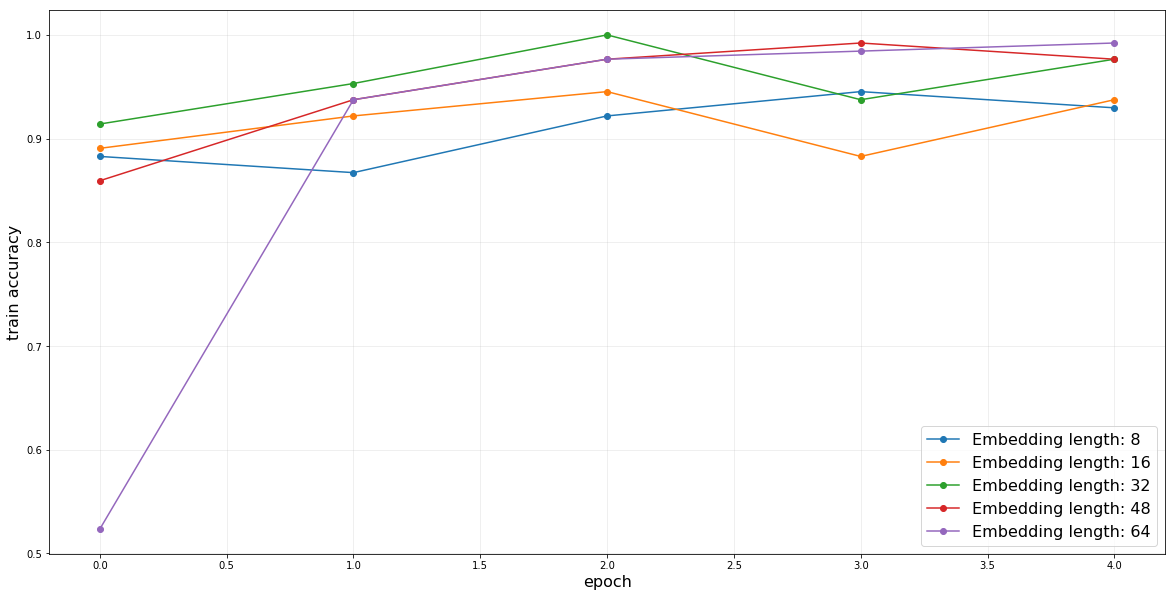

In [146]:
# YOUR CODE HERE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

epoch_indexes = np.linspace(0, len(train_accuracy_matrix[0]) - 2, 5).astype(int)

for i, length in enumerate([8, 16, 32, 48, 64]):
    plt.plot(np.take(train_accuracy_matrix[i], epoch_indexes), '-o', label='Embedding length: ' + str(length))

ax.grid(alpha=0.25)
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epoch", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()


Give your observation and explanation below.

By increasing the embedding length, the accuracy seemed to increase after training. Having a higher dimension embedding allows the model to learn more complex representations of the words. Having too low of a dimensionality for the embedding can cause many generalizations to be made, but having too high of a dimension can cause the words to have little relation to each other. In addition, higher embedding leads to a larger network that can take longer to train.

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/6Kf72C26am1SAjtg6) to solicit your feedback for how to improve the course.